In [2]:
import pandas as pd
data=pd.read_csv('03_2010_df_625 Variables.csv')

In [3]:
data[data.Date<'2012-01-01'].shape

(35064, 625)

In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
#Separating catagorical and numerical columns
binary_cols=['holiday']
other_cols=['Date','Hour','month','weekday','quarter','month.week']
need_zscore   = [x for x in data.columns if x not in binary_cols+other_cols]

In [13]:
for col in need_zscore:
    data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

In [14]:
box=pd.read_csv('04_Box_Cox_load.csv',index_col=False)

In [15]:
box=box.drop('Unnamed: 0',axis=1)

In [16]:
box.index=pd.Int64Index(box.index)

In [17]:
data.index=pd.Int64Index(data.index)

In [18]:
box_data=pd.merge(data, box, left_on=data.index,right_on=box.index,how='left')

In [19]:
box_data = box_data.drop('key_0',axis=1)

In [20]:
box_data[box_data['Date']>='2011-12-31']

,Date,Hour,Temperature,Load,month,weekday,Distance,TemperatureLag1,TemperatureLag2,TemperatureLag24,...,holiday.temp_mean_6.SR,holiday.temp_mean_6.SQUARE,holiday.temp_mean_6.CUBE,holiday.temp_mean_12.SR,holiday.temp_mean_12.SQUARE,holiday.temp_mean_12.CUBE,holiday.temp_mean_24.SR,holiday.temp_mean_24.SQUARE,holiday.temp_mean_24.CUBE,box
35040,2011-12-31,1,-0.732274,-0.720468,December,Saturday,-0.056790,-0.797231,-0.683562,-0.862755,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.788346
35041,2011-12-31,2,-0.764484,-0.954374,December,Saturday,0.002644,-0.732321,-0.797277,-0.781736,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.282733
35042,2011-12-31,3,-0.813287,-1.113620,December,Saturday,0.092695,-0.764532,-0.732367,-0.732928,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.925719
35043,2011-12-31,4,-0.878684,-1.218058,December,Saturday,0.213365,-0.813336,-0.764578,-0.651421,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.685532
35044,2011-12-31,5,-0.959698,-1.249993,December,Saturday,0.362850,-0.878734,-0.813383,-0.635314,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.611087
35045,2011-12-31,6,-0.976291,-1.253446,December,Saturday,0.393468,-0.959749,-0.878782,-0.553807,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.603010
35046,2011-12-31,7,-1.008501,-1.142103,December,Saturday,0.452902,-0.976343,-0.959798,-0.553807,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,32.860702
35047,2011-12-31,8,-1.008501,-0.982425,December,Saturday,0.452902,-1.008554,-0.976392,-0.521106,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.220625
35048,2011-12-31,9,-0.894789,-0.903881,December,Saturday,0.243082,-1.008554,-1.008603,-0.472299,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.393714
35049,2011-12-31,10,-0.797182,-0.847347,December,Saturday,0.062978,-0.894840,-1.008603,-0.440086,...,-0.15029,-0.114809,-0.098853,-0.150096,-0.115384,-0.099998,-0.149662,-0.116331,-0.101577,33.516753


In [21]:
box_data.columns.values

array(['Date', 'Hour', 'Temperature', 'Load', 'month', 'weekday',
       'Distance', 'TemperatureLag1', 'TemperatureLag2',
       'TemperatureLag24', 'TemperatureLag48', 'TemperatureLagSQUARE',
       'TemperatureLagSQUARE1', 'TemperatureLagSQUARE2',
       'TemperatureLagSQUARE24', 'TemperatureLagSQUARE48',
       'TemperatureLagCUBE', 'TemperatureLagCUBE1', 'TemperatureLagCUBE2',
       'TemperatureLagCUBE24', 'TemperatureLagCUBE48', 'TemperatureLagSR',
       'TemperatureLagSR1', 'TemperatureLagSR2', 'TemperatureLagSR24',
       'TemperatureLagSR48', 'DistanceLag1', 'DistanceLag2',
       'DistanceLag24', 'DistanceLag48', 'DistanceLagSQUARE',
       'DistanceLagSQUARE1', 'DistanceLagSQUARE2', 'DistanceLagSQUARE24',
       'DistanceLagSQUARE48', 'DistanceLagCUBE', 'DistanceLagCUBE1',
       'DistanceLagCUBE2', 'DistanceLagCUBE24', 'DistanceLagCUBE48',
       'DistanceLagSR', 'DistanceLagSR1', 'DistanceLagSR2',
       'DistanceLagSR24', 'DistanceLagSR48', 'day', 'month.week',
       '

In [22]:
box_data['Load_BoxCox']=box_data['box']

In [23]:
box_data = box_data.drop('box',axis=1)

In [24]:
sum(data.isnull().sum()>12)

225

In [25]:
train_set = box_data[box_data['Date']<'2011-01-01']
test_set = box_data[(box_data['Date']>='2011-01-01') & (box_data['Date']<'2012-01-01')]

In [26]:
train_set=train_set.dropna()

In [27]:
# X_train_set = train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1).values
# Y_train_set = train_set['Load_BoxCox'].values

# X_test_set = test_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1).values
# Y_test_set = test_set['Load_BoxCox'].values

X_train_set = train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week'],axis=1).values
Y_train_set = train_set['Load_BoxCox'].values

X_test_set = test_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week'],axis=1).values
Y_test_set = test_set['Load_BoxCox'].values

In [35]:
X_train_set.shape

array([[-0.53705961, -0.41699671, -0.43949544, ..., -0.14966174,
        -0.11633091, -0.10157666],
       [-0.66687694, -0.17745939, -0.53710405, ..., -0.14966174,
        -0.11633091, -0.10157666],
       [-0.73227364, -0.05679021, -0.66692351, ..., -0.14966174,
        -0.11633091, -0.10157666],
       ...,
       [-0.55316477, -0.38727968, -0.53710405, ..., -0.14966174,
        -0.11633091, -0.10157666],
       [-0.53705961, -0.41699671, -0.55320947, ..., -0.14966174,
        -0.11633091, -0.10157666],
       [-0.55316477, -0.38727968, -0.53710405, ..., -0.14966174,
        -0.11633091, -0.10157666]])

In [29]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.feature_selection import RFECV

In [30]:
# # params = {'n_estimators':100, 'max_depth':8, 'min_samples_split':500, 'min_sample_leaf':50,'learning_rate':.2, 
# #                 'loss':'ls'}
# GB = GradientBoostingRegressor()
# model = GB

# rfecv = RFECV(estimator=model, step=1, verbose=0)
# rfecv.fit(X_train_set, Y_train_set)

# var_ranking = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), significant)),
#                             columns = ['ranking', 'variable'])
# pd.options.display.max_rows = 150
# print(var_ranking)

In [31]:
# var_selected=var_ranking[var_ranking.ranking==1]
# print(var_selected)

In [32]:
def custom_asymmetric_train(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual<0, -2*10.0*residual, -2*residual)
    hess = np.where(residual<0, 2*10.0, 2.0)
    return grad, hess

def custom_asymmetric_valid(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual**2)*10.0, residual**2) 
    return "custom_asymmetric_eval", np.mean(loss), False

In [33]:
import lightgbm
# default lightgbm model with sklearn api
import numpy as np
gbm = lightgbm.LGBMRegressor() 

# updating objective function to custom
# default is "regression"
# also adding metrics to check different scores
gbm.set_params(**{'objective': custom_asymmetric_train}, metrics = ["mape"])

# fitting model 
gbm.fit(
    X_train_set,
    Y_train_set,
#     eval_set=[(X_test_set, Y_test_set)],
    eval_metric=custom_asymmetric_valid,
    verbose=False,
)

y_pred = gbm.predict(X_test_set)


/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


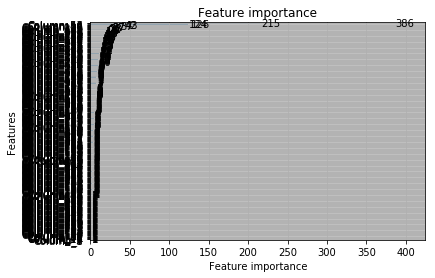

In [36]:
import matplotlib.pyplot as plt
lightgbm.plot_importance(gbm,height=0.2)
plt.show()

importance_type (string, optional (default="split")) – How the importance is calculated. If “split”, result contains numbers of times the feature is used in a model. If “gain”, result contains total gains of splits which use the feature.

In [40]:
# gbm.feature_importances_
var_rank=pd.DataFrame(train_set.columns.values,columns=['Var_Name'])

In [41]:
rank=pd.Series(gbm.feature_importances_)
var_rank['rank']=rank

In [42]:
var_rank = var_rank.sort_values(by='rank',ascending=False)

In [43]:
var_rank=var_rank.reset_index().drop('index',axis=1)

In [44]:
var_rank[var_rank['rank']==0].Var_Name.values

array(['TemperatureLagCUBE24', 'month.week_Mean_Encoding.temp_min_12.SR',
       'holiday.TemperatureLag1',
       'month.week_Mean_Encoding.temp_min_6.SQUARE',
       'month.week_Mean_Encoding.temp_min_12.SQUARE', 'holiday.Distance',
       'TemperatureLagSR', 'month.week_Mean_Encoding.temp_mean_24.CUBE',
       'TemperatureLagSR1', 'month.week_Mean_Encoding.temp_std_24.SQUARE',
       'TemperatureLagSQUARE1',
       'month.week_Mean_Encoding.temp_min_12.CUBE',
       'month.week_Mean_Encoding.temp_std_6.SQUARE',
       'month.week_Mean_Encoding.temp_min_24.SQUARE',
       'TemperatureLagCUBE1', 'TemperatureLagCUBE',
       'month.week_Mean_Encoding.temp_max_24.SR',
       'month.week_Mean_Encoding.temp_std_24.SR',
       'month.week_Mean_Encoding.temp_std_12.SR',
       'month.week_Mean_Encoding.temp_min_24.SR',
       'month.week_Mean_Encoding.temp_max_12.SQUARE',
       'month.week_Mean_Encoding.temp_max_6.CUBE',
       'month.week_Mean_Encoding.temp_max_24.SQUARE',
       'Tempera

In [45]:
new_selected_features_df = var_rank[var_rank['rank']>0]

In [46]:
new_selected_features_df.shape

(397, 2)

In [47]:
y_pred
y_pred_t = pd.Series(y_pred)

In [48]:
y_pred_t

0       33.245575
1       33.115655
2       32.854344
3       32.884603
4       33.037501
5       33.179544
6       33.373838
7       33.778091
8       34.323693
9       34.523153
10      35.117942
11      35.369170
12      35.304262
13      35.383304
14      35.512087
15      35.437545
16      35.368121
17      35.560412
18      35.696794
19      35.675600
20      35.802962
21      36.051115
22      35.532160
23      34.947808
24      34.748254
25      34.311770
26      33.838466
27      33.677136
28      33.823070
29      33.979575
          ...    
8730    35.684811
8731    35.786407
8732    35.458175
8733    35.404929
8734    34.705301
8735    34.557239
8736    33.815175
8737    33.588960
8738    33.270717
8739    33.201420
8740    33.141932
8741    33.131402
8742    33.335081
8743    33.501352
8744    33.652549
8745    34.210146
8746    34.206592
8747    34.240134
8748    34.115379
8749    34.160086
8750    34.173351
8751    34.094887
8752    34.074162
8753    34.497937
8754    34

In [49]:
df=pd.DataFrame(Y_test_set,columns=['Test_Y'])
df['Pred_Y_Test']=y_pred

In [50]:
y_train_fit = gbm.predict(X_train_set)
y_pred_train = pd.Series(y_train_fit)

In [51]:
y_pred_train

0        35.580525
1        35.479752
2        35.057298
3        34.927011
4        34.884834
5        35.107640
6        35.496512
7        36.548090
8        36.789829
9        36.897126
10       36.952542
11       36.939993
12       36.659303
13       36.568888
14       36.571334
15       36.564571
16       36.542223
17       36.941953
18       37.446186
19       37.399137
20       37.198200
21       37.135979
22       36.715497
23       35.994018
24       35.254155
25       35.007185
26       34.482502
27       34.294406
28       34.285254
29       34.493427
           ...    
26226    35.860910
26227    35.803707
26228    35.538855
26229    35.553693
26230    35.313628
26231    34.482976
26232    33.619012
26233    33.327254
26234    32.662548
26235    32.596520
26236    32.537982
26237    32.605748
26238    32.950239
26239    33.499594
26240    34.059591
26241    34.518380
26242    34.395863
26243    34.462801
26244    34.465158
26245    34.484934
26246    34.542552
26247    34.

In [52]:
df_t=pd.DataFrame(Y_train_set,columns=['Train_Y'])

In [53]:
df_t

,Train_Y
0,36.003434
1,35.533876
2,35.281840
3,35.141221
4,35.146125
5,35.329435
6,35.821265
7,36.614331
8,37.003447
9,37.096300


In [54]:
df_t['Pred_Y_Train']=y_pred_train

In [55]:
df

,Test_Y,Pred_Y_Test
0,33.470880,33.245575
1,33.129259,33.115655
2,32.874523,32.854344
3,32.605030,32.884603
4,32.556459,33.037501
5,32.573684,33.179544
6,32.807236,33.373838
7,33.079915,33.778091
8,33.279874,34.323693
9,33.506470,34.523153


In [56]:
df.to_csv('test_result.csv')
df_t.to_csv('train_result.csv')